<h1>Air BnB Project Introduction</h1>

<br>
<div>
    <p> Begining in 2008 Air Bnb has become an icon of the travel world, becoming many things, an escape from busy city life, a vacation home, or even a hub to explore new places for it's milions of Host and Guest alike. This one of a kind service provides millions of listings, Thats a lot of Data. Data We can use to analyze Customer and Host behavior, Proformance on the platform, guiding marketing campains, impleamentation of new services and Ultimatly, business decisons.</p>
</div>

<h3>Air BnB Listings interactive Map Project</h3>

<p>For this Project, I have build an interactive Map using serveral python Packages, Inculding Pandas, Matplotlib, Json and folium</p>
    
<p> The Objective of this workbook is to <strong>clean</strong>, <strong>explore</strong> and <strong>analyze</strong> the 2021 AirBnb dataset provided by <a href = "http://insideairbnb.com/get-the-data">Inside Air BnB</a> containing 15 columns and 1263 entires. The data set is a mix of numeric and catigorical data (rows)</p>

<p> Through this Analysis I have discovered key factors providing insight into (But not limited to):
    <br>
    <br>
        - The best location for new locations
    <br>
        - Which locations attract the most guest and why?
    <br>
        - and the min, mean and max rental prices for return on investment. </p>

In [1]:
## Importing packages for data cleaning and analysis
import folium as fo
import pandas as pd
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
# "magic command" for juptyer notebooks to view charts in the notebooks
%matplotlib inline

In [2]:
# The dataset below is an AirBnb listings data_set (current as of 02/2021) ploting over 1263 entires. 
data = pd.read_csv('listings2.csv')

#data = data.convert_dtypes()

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1263 non-null   int64  
 1   name                            1263 non-null   object 
 2   host_id                         1263 non-null   int64  
 3   host_name                       1263 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   1263 non-null   object 
 6   latitude                        1263 non-null   float64
 7   longitude                       1263 non-null   float64
 8   room_type                       1263 non-null   object 
 9   price                           1263 non-null   int64  
 10  minimum_nights                  1263 non-null   int64  
 11  number_of_reviews               1263 non-null   int64  
 12  last_review                     87

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,NaN,Ward C (councilmember Richard Boggiano),40.73742,-74.05255,Private room,82,3,10,2019-10-12,0.08,2,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,NaN,Ward B (councilmember Mira Prinz-Arey),40.72813,-74.07037,Entire home/apt,2000,150,0,NaN,NaN,1,0
2,146144,Shared Room,266070,Patricia,NaN,Ward E (councilmember James Solomon),40.71077,-74.03833,Shared room,200,2,0,NaN,NaN,1,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,NaN,Ward F (councilmember Jermaine D. Robinson),40.71663,-74.05799,Entire home/apt,106,6,127,2021-01-09,1.10,1,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,NaN,Ward F (councilmember Jermaine D. Robinson),40.71266,-74.06329,Entire home/apt,84,2,354,2021-01-03,3.14,7,0


In [4]:
### Here I began to clean and re organize the Data_set 
# using .replace to remap and clear out the council member information 
data.replace(to_replace = [

    'Ward E (councilmember James Solomon)', 
    'Ward C (councilmember Richard Boggiano)',       
    'Ward D (councilmember Michael Yun)',             
    'Ward F (councilmember Jermaine D. Robinson)',    
    'Ward B (councilmember Mira Prinz-Arey)', 
    'Ward A (councilmember Denise Ridley)', 

], value = ['Ward E', 'Ward C', 'Ward D', 'Ward F', 'Ward B', 'Ward A'], inplace = True)

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,NaN,Ward C,40.73742,-74.05255,Private room,82,3,10,2019-10-12,0.08,2,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,NaN,Ward B,40.72813,-74.07037,Entire home/apt,2000,150,0,NaN,NaN,1,0
2,146144,Shared Room,266070,Patricia,NaN,Ward E,40.71077,-74.03833,Shared room,200,2,0,NaN,NaN,1,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,NaN,Ward F,40.71663,-74.05799,Entire home/apt,106,6,127,2021-01-09,1.10,1,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,NaN,Ward F,40.71266,-74.06329,Entire home/apt,84,2,354,2021-01-03,3.14,7,0


In [6]:
# dropped calculated_host_listings_count, Minium_nights and Neighbourhood_group as they are not useful for this project 

data.drop(['calculated_host_listings_count','minimum_nights', 'last_review', 'neighbourhood_group'], axis = 1, inplace = True)

In [7]:
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,Ward C,40.73742,-74.05255,Private room,82,10,0.08,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,Ward B,40.72813,-74.07037,Entire home/apt,2000,0,NaN,0
2,146144,Shared Room,266070,Patricia,Ward E,40.71077,-74.03833,Shared room,200,0,NaN,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,Ward F,40.71663,-74.05799,Entire home/apt,106,127,1.10,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,Ward F,40.71266,-74.06329,Entire home/apt,84,354,3.14,0


<h3> Renameing Columns</h3> 

In [8]:
# Renaming the neigbourhood column to Ward and categorized by ward in order
data.rename(
columns ={'neighbourhood':'Ward'}, inplace = True)
data['Ward'] = pd.Categorical(data['Ward'],
                categories=['Ward A', 'Ward B', 'Ward C', 'Ward D', 'Ward E', 'Ward F'], ordered = True)

In [9]:
data.head()

,id,name,host_id,host_name,Ward,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,Ward C,40.73742,-74.05255,Private room,82,10,0.08,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,Ward B,40.72813,-74.07037,Entire home/apt,2000,0,NaN,0
2,146144,Shared Room,266070,Patricia,Ward E,40.71077,-74.03833,Shared room,200,0,NaN,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,Ward F,40.71663,-74.05799,Entire home/apt,106,127,1.10,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,Ward F,40.71266,-74.06329,Entire home/apt,84,354,3.14,0


In [10]:
# Renaming columns 
data.rename(
columns = {'name':'Listing'}, inplace = True)

data.rename(
columns= {'room_type': 'Rooms'}, inplace = True)


In [11]:
data['Rooms'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

<h3> Correcting NA values</h3>


In [12]:
# filled NA data with 0 value

data[['number_of_reviews', 'reviews_per_month']] = data[['number_of_reviews', 'reviews_per_month']].fillna(value=0)


In [13]:
data.head(50)

,id,Listing,host_id,host_name,Ward,latitude,longitude,Rooms,price,number_of_reviews,reviews_per_month,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,Ward C,40.73742,-74.05255,Private room,82,10,0.08,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,Ward B,40.72813,-74.07037,Entire home/apt,2000,0,0.00,0
2,146144,Shared Room,266070,Patricia,Ward E,40.71077,-74.03833,Shared room,200,0,0.00,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,Ward F,40.71663,-74.05799,Entire home/apt,106,127,1.10,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,Ward F,40.71266,-74.06329,Entire home/apt,84,354,3.14,0
5,270245,Private room with own bathroom close to NYC,1410590,Magda,Ward F,40.71203,-74.06532,Private room,38,221,1.97,361
6,271255,Large Room with private bathroom min to Manhattan,1410590,Magda,Ward F,40.71258,-74.06284,Private room,59,257,2.38,362
7,309274,"Industrial Modern, Homey Studio 10 minutes to ...",1532691,Damon,Ward E,40.72196,-74.04850,Entire home/apt,90,6,0.14,83
8,508581,7 MIN TO MANHATTAN - LARGE APT,2506890,Zachary,Ward E,40.71979,-74.04549,Entire home/apt,139,55,0.52,365
9,526615,"2 bedroom, minutes from bus stop to journal sq",2588186,Massimo,Ward A,40.70552,-74.09690,Entire home/apt,59,4,0.05,260


In [14]:
# Testing for Null Values in the dataset following cleaning. 
data.notnull()

,id,Listing,host_id,host_name,Ward,latitude,longitude,Rooms,price,number_of_reviews,reviews_per_month,availability_365
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,True,True,True,True,True,True,True,True,True,True,True,True
1259,True,True,True,True,True,True,True,True,True,True,True,True
1260,True,True,True,True,True,True,True,True,True,True,True,True
1261,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 1263 non-null   int64   
 1   Listing            1263 non-null   object  
 2   host_id            1263 non-null   int64   
 3   host_name          1263 non-null   object  
 4   Ward               1263 non-null   category
 5   latitude           1263 non-null   float64 
 6   longitude          1263 non-null   float64 
 7   Rooms              1263 non-null   object  
 8   price              1263 non-null   int64   
 9   number_of_reviews  1263 non-null   int64   
 10  reviews_per_month  1263 non-null   float64 
 11  availability_365   1263 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(3)
memory usage: 110.1+ KB


In [16]:
# prep bar chart data
bar_chart_height = data["Rooms"].value_counts()
print(type(bar_chart_height))
print(bar_chart_height)
x_values_barchart= bar_chart_height.index
print(x_values_barchart)

<class 'pandas.core.series.Series'>
Entire home/apt    845
Private room       399
Hotel room          12
Shared room          7
Name: Rooms, dtype: int64
Index(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], dtype='object')


In [18]:
# save cleaned dataset to new CSV
data.to_csv('clean_listings.csv', index = False )

In [19]:
# importing cleaned listings dataset
listings_df = pd.read_csv('clean_listings.csv')


In [20]:
# Confirming DataFrame column and datatype status. 
listings_df.head()

,id,Listing,host_id,host_name,Ward,latitude,longitude,Rooms,price,number_of_reviews,reviews_per_month,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,Ward C,40.73742,-74.05255,Private room,82,10,0.08,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,Ward B,40.72813,-74.07037,Entire home/apt,2000,0,0.00,0
2,146144,Shared Room,266070,Patricia,Ward E,40.71077,-74.03833,Shared room,200,0,0.00,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,Ward F,40.71663,-74.05799,Entire home/apt,106,127,1.10,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,Ward F,40.71266,-74.06329,Entire home/apt,84,354,3.14,0


In [21]:
# Summarize data for choropleth map with listings count per ward
df_wards_summary = listings_df.groupby('Ward')[['Listing']].count()
df_wards_summary


,Listing
Ward,
Ward A,62
Ward B,102
Ward C,233
Ward D,212
Ward E,492
Ward F,162


In [22]:
# when you reset the index it converts the previous index values into columns
df_wards_summary.reset_index(inplace = True)

In [23]:
df_wards_summary

,Ward,Listing
0,Ward A,62
1,Ward B,102
2,Ward C,233
3,Ward D,212
4,Ward E,492
5,Ward F,162


In [24]:
# Extracts the ward letters from the full text(Removing The letters from "wards")
df_wards_summary.Ward = df_wards_summary.Ward.apply(lambda x: x[-1])

In [25]:
df_wards_summary

,Ward,Listing
0,A,62
1,B,102
2,C,233
3,D,212
4,E,492
5,F,162


<h3> Json, GeoJson and the wards</h3>
<p> The Below <strong>GeoJson data</strong> was obtained from the <a herf = "https://www.jerseycitynj.gov/">Jersery.Gov</a> Offical website has been loaded in and extracted in order to build the wards of Jersey.</p>

<h5> Please Note:<h5>

<p>The Ward data reflects the wards as they were during the time period of the AirBNB listings data (2019) and does not reflect the currect ward information of Jersey City in it's on going Ward Remapping </p>

In [26]:
import json

In [27]:
#loading GeoJson data. 
with open ('jersey-city-ward-and-councilperson-map-2018.geojson') as j:
    city_wards= json.load(j)

In [28]:
#returns the key(s) of a dictionary
city_wards.keys()

dict_keys(['type', 'features'])

In [29]:
# Features Key used to extract the GeoJson data need for mapping the Wards.
city_wards['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-74.05149192582515, 40.711751797471194],
    [-74.04668044585559, 40.72067578257309],
    [-74.05610351084846, 40.72358216450542],
    [-74.05449652418017, 40.72617728885873],
    [-74.05394653629386, 40.72747321552204],
    [-74.05358450366658, 40.728326756781506],
    [-74.05198500020619, 40.73070099981172],
    [-74.05149520281819, 40.731279671065955],
    [-74.05188468697779, 40.731448001419245],
    [-74.05167837102329, 40.73155667432166],
    [-74.05149222754537, 40.731722768790206],
    [-74.05132671142762, 40.7318785170349],
    [-74.05043828586733, 40.73253190447189],
    [-74.05012776735893, 40.732848690643436],
    [-74.04905087440594, 40.73400699821543],
    [-74.04826929656426, 40.73506740370726],
    [-74.0462028023992, 40.73560666753097],
    [-74.04455527909391, 40.73600679598838],
    [-74.04377312779624, 40.736134033220175],
    [-74.0428152892123, 40.736308312498934],
    [-74.0427637170384, 40.

### Creating the Listing Map

<p> Using <strong>Folium</strong>, <strong>MarkerCluster</strong>, the GeoJson Data and the Airbnb data, I have created a map that will showcase all listings location for each ward. I have added icons to have each listing stand out on an <i>interactive map</i> and information regarding each listing on click of a location.</p>  

In [30]:
# defualt basic map using Jersery city as a center location. Zoom start sets default level of zoom on the map.
listings_map = fo.Map(location =[40.7153535,-74.1387711], zoom_start = 13)

<h3> Creating Main ward and listings location clusters</h3>

In [31]:
# Creating main Marker Clusters (folium) for each ward of the map

wards = listings_df.Ward.unique()
for ward in wards:
    ward_cluster = MarkerCluster(name=ward).add_to(listings_map)
    mapdata_ward = listings_df[listings_df.Ward==ward]
    
    # adding indivisual Markers for each listing via MarkerCluster by index placement
    for idx in mapdata_ward.index:
        lat = mapdata_ward.latitude[idx]
        long = mapdata_ward.longitude[idx]
        listing = mapdata_ward.Listing[idx]
        price = mapdata_ward.price[idx]
        host = mapdata_ward.host_name[idx]
        room_type = mapdata_ward.Rooms[idx]
        review_count = mapdata_ward.number_of_reviews
        popup_info = f'<b> Listing #{listing}<b>\nHost: {host}\n${price} \n{room_type}\nReviews:{review_count}'
        fo.Marker(
        location =[lat, long],
        popup = popup_info, 
        icon =fo.Icon(color = "red", icon ="bed", prefix = "fa")
        ).add_to(ward_cluster) # icon provided by font_awesome

<h3> Looping through the DataFrame index/row for all listings</h3>
<br>
<p> Looping through the dataframe index for each loction for price/room type(rooms) and total and monthly Reviews. This information is then added to the popup variable for a more detailed understanding of each listing. </p>  

In [32]:
# Looping through the idx/row of listings_df to clean up listings information on pop up text.
for idx, row in listings_df[:5].iterrows():
     popup_text = f'<b>Listing #{row.Listing}</b>\n${row.price}\n{row.Rooms}\nReviews: {row.number_of_reviews}\nMonthly Reviews: {row.reviews_per_month}'
     fo.Marker(
         location=[row.latitude, row.longitude],
         popup=popup_text,
         icon=fo.Icon(color = "red", icon ="bed", prefix = "fa"),
     ).add_to(listings_map)

In [33]:
# geojson data defining the boundaries of the Colorpleth. Colorpleth is a "heat map" defined by a spectrem of color. 

choropleth = fo.Choropleth(
    geo_data = city_wards,
    data = df_wards_summary, # AirBnb listing data
    columns = ['Ward', 'Listing'],
    key_on = ('feature.properties.ward'), # sets what data Choropleth will build the map boundaries ,
    fill_color = 'RdPu',
    fill_opacity = 0.3,
    line_opacity = 0.4,
    legend = 'AirBnb listings by Ward',
    highlight =True,
).add_to(listings_map)

In [34]:
# add pop-up with ward name
choropleth.geojson.add_child(
    fo.features.GeoJsonTooltip(['ward'],labels=True)
)

In [35]:
listings_map

In [36]:
# add popup with Ward name
#choropleth.geojson.add_child(
#folium.features.GeoJsonTooltip(['Ward'], labels = True))

In [39]:
listings_df.head(10)

,id,Listing,host_id,host_name,Ward,latitude,longitude,Rooms,price,number_of_reviews,reviews_per_month,availability_365
0,40669,Skyy’s Lounge / Cozy,175412,Skyy,Ward C,40.73742,-74.05255,Private room,82,10,0.08,364
1,63282,"2bed/2bath,furnished,doorman, by NY",304762,Gil,Ward B,40.72813,-74.07037,Entire home/apt,2000,0,0.00,0
2,146144,Shared Room,266070,Patricia,Ward E,40.71077,-74.03833,Shared room,200,0,0.00,0
3,215768,Minutes to Manhattan & Jersey Shore,846837,Charlaine,Ward F,40.71663,-74.05799,Entire home/apt,106,127,1.10,365
4,269266,Modern private 2 bedrooms apt minutes to NYC,1410590,Magda,Ward F,40.71266,-74.06329,Entire home/apt,84,354,3.14,0
5,270245,Private room with own bathroom close to NYC,1410590,Magda,Ward F,40.71203,-74.06532,Private room,38,221,1.97,361
6,271255,Large Room with private bathroom min to Manhattan,1410590,Magda,Ward F,40.71258,-74.06284,Private room,59,257,2.38,362
7,309274,"Industrial Modern, Homey Studio 10 minutes to ...",1532691,Damon,Ward E,40.72196,-74.04850,Entire home/apt,90,6,0.14,83
8,508581,7 MIN TO MANHATTAN - LARGE APT,2506890,Zachary,Ward E,40.71979,-74.04549,Entire home/apt,139,55,0.52,365
9,526615,"2 bedroom, minutes from bus stop to journal sq",2588186,Massimo,Ward A,40.70552,-74.09690,Entire home/apt,59,4,0.05,260


<h3> What is the Cost of booking by Ward?</h3>  
<br>
<p>Below the barchart displays the Wards and its prices. We can see that ward B leads the other wards by a wide margin.<p>
<br>
<p> As can be observed on the above map, while Ward E has the most listings, it is not the lead in terms of cost even given its proximity to NYC. Thus, it may be possible That Ward B(s) Proxmity to the rest of New Jersey such as The jersey Shore, Lincon Park and Atlantic City are a more attractive location.

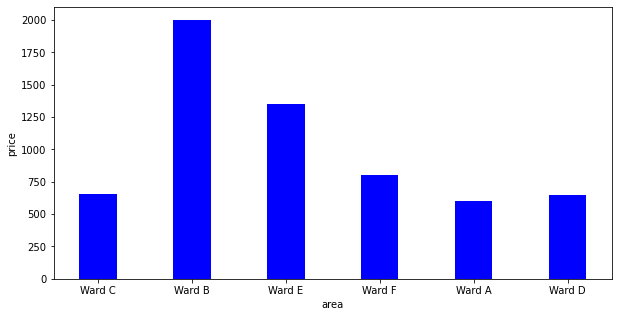

In [40]:
area = listings_df["Ward"]
price = listings_df['price']

fig = plt.figure(figsize = (10,5))

# Creating the Bar chart plot

plt.bar(area, price, color = 'blue', width = 0.4 )

plt.xlabel('area')
plt.ylabel('price')
plt.show()